<a href="https://colab.research.google.com/github/SaraiEscatel/MachineLearning/blob/main/Hands_on_5_Classification_with_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introducción a k-Nearest Neighbors (kNN)

El algoritmo k-Nearest Neighbors (kNN) es un método de aprendizaje supervisado utilizado tanto para clasificación como para regresión.
Su principio básico es que los objetos similares están cerca entre sí en el espacio de características.

Cuando se desea predecir la clase de un nuevo dato, el modelo busca los k vecinos más cercanos en el conjunto de entrenamiento y asigna la clase más común entre ellos.

Es un algoritmo no paramétrico, lo que significa que no asume una forma específica de la función de distribución de los datos.


##Modelo matemático


Sea un conjunto de entrenamiento:


$$D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$$


donde:

- \( x_i \) son los vectores de características  
- \( y_i \) son las etiquetas de clase  

Para clasificar un nuevo punto \( x \):

1. Se calcula la **distancia** (usualmente euclidiana) entre \( x \) y todos los puntos del conjunto de entrenamiento:

$$
d(x, x_i) = \sqrt{\sum_{j=1}^p (x_j - x_{ij})^2}
$$

2. Se seleccionan los **k puntos más cercanos**.  
3. La clase asignada a \( x \) es la **más frecuente** entre esos vecinos.


Parámetros importantes:

n_neighbors: número de vecinos (k)

metric: tipo de distancia (por defecto 'minkowski')

weights: 'uniform' (todos los vecinos pesan igual) o 'distance' (más peso a los más cercanos)

Funciones principales:

fit(X, y): entrena el modelo

predict(X_new): predice la clase de nuevas observaciones

score(X_test, y_test): calcula la exactitud (accuracy)

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Convertir a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print("Primeras filas del dataset:")
display(df.head())



Primeras filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3. Visualización inicial

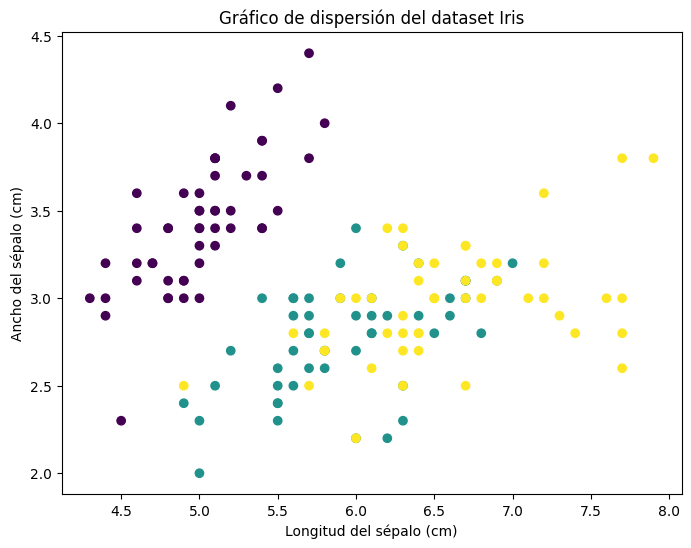

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'], cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Gráfico de dispersión del dataset Iris')
plt.show()



Seleccionamos las variables más relevantes (todas para este ejemplo) y normalizamos los datos para que todas las características tengan el mismo peso.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [ ]:
#  5. Escalado (normalización) de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



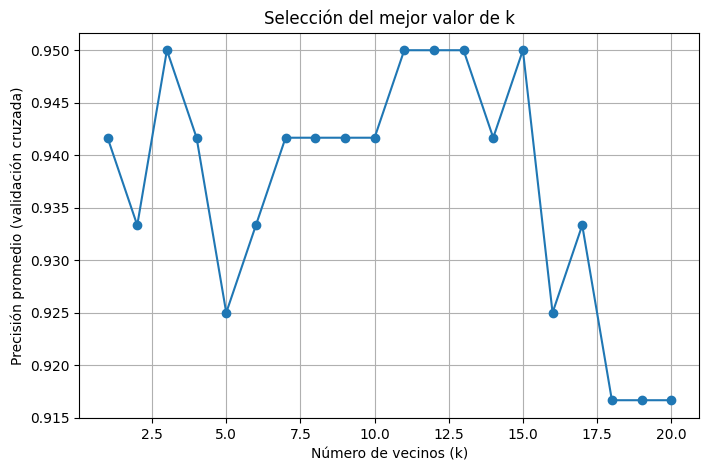

Mejor valor de k encontrado: {best_k}


In [23]:
#  6. Búsqueda del mejor valor de k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    accuracies.append(scores.mean())

# Gráfico del rendimiento por valor de k
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Selección del mejor valor de k')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión promedio (validación cruzada)')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Mejor valor de k encontrado: {best_k}")


In [ ]:

# 7. Entrenar modelo kNN con el mejor k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#  8. Predicciones y evaluación del modelo
y_pred = knn.predict(X_test)

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm)
print("\nAccuracy:", round(acc, 3))
print("\nReporte de Clasificación:\n",
      classification_report(y_test, y_pred, target_names=iris.target_names))


Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



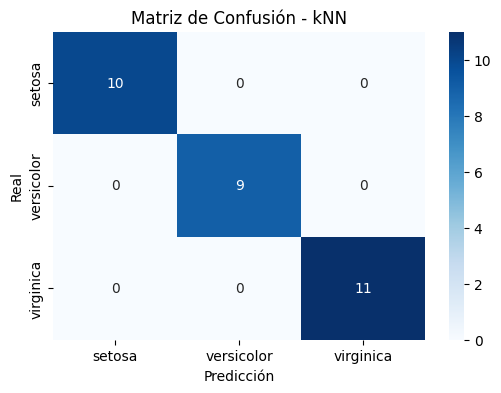

In [ ]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - kNN')
plt.show()

In [ ]:
#  9. Visualización de fronteras de decisión (2 variables)

X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

In [ ]:
# Escalado
scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

In [ ]:
# Modelo con mejor k
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Crear malla de puntos
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [ ]:

# Predicción en la malla
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

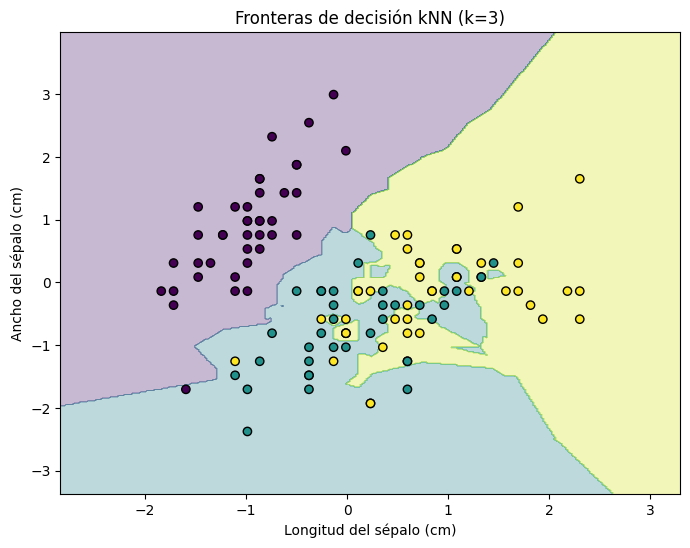

In [ ]:
# Gráfico de fronteras
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1],
            c=y_train_vis, cmap='viridis', edgecolor='k')
plt.title(f'Fronteras de decisión kNN (k={best_k})')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.show()

In [ ]:
# 10. Predicción de un nuevo patrón
nuevo_patron = np.array([[5.2, 3.4, 1.4, 0.2]])

In [ ]:
# Escalar con el mismo scaler usado para el modelo
nuevo_patron_scaled = scaler.transform(nuevo_patron)

In [ ]:
#prediccion
prediccion = knn.predict(nuevo_patron_scaled)
print(f"\n Nuevo patrón clasificado como: {iris.target_names[prediccion][0]}")


 Nuevo patrón clasificado como: virginica


Referencias bibliográficas (APA 7)

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. O’Reilly Media.

Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21–27.